# Métodos de Monte Carlo

El término "método de Monte Carlo" se aplica en general a cualquier método numérico que emplea números aleatorios. Las caminatas aleatorias se pueden ver como un tipo de método de Monte Carlo.

En este notebook, veremos dos tipos diferentes de métodos de Monte Carlo: uno para simulación estocástica de un problema físico que tiene la estocasticidad inherente; y otro para calcular una cantidad determinista (una integral).


## Decaimiento radioactivo 

En esta sección, haremos un modelo de decaimiento radioactivo, el cual es un proceso físico inherentemente estocástico. Este proceso se suele modelar con una ecuación diferencial ordinaria, la cual, en mi opinión, es muy poco motivada. El modelaje estocástico explica mucho mejor lo que está pasando.

Supón que empecemos con $N$ núcleos radioactivos, y que en cada paso $\delta t$ de tiempo, una proporción $p$ decaen en promedio. Podemos modelar eso como sigue.

#### Ejercicio 1 

(i) Toma $N = 100$ núcleos, y $p=0.01$. En cada paso, cada núcleo que siga sin decaerse decae con probabilidad $p$. Escribe una función para llevar a cabo la simulación por un cierto número de pasos; la función debe aceptar $N$ y $p$ como variables. 

En cada paso, calcula el número de núcleos que decaigan en ese paso.
Devuelve el número de núcleos $N(t)$ en el tiempo $t$, para todos los $t$. 

(ii) Dibuja $N(t)$ en distintas corridas en una sola gráfica. ¿Qué observas? ¿Tiene sentido físico?

(iii) Calcula el promedio $\langle N \rangle (t)$ sobre distintas corridas y dibújalo encima de tu gráfica. ¿Qué tipo de comportamiento esperas que tenga? Verifica esto al dibujar la gráfica con otro tipo de eje.

In [104]:
#i
function paso(N0,p)
    N=N0
    c=0
    for i in 1:N0
        if rand()< p
        #hace la cosa con prob. p
        N=N-1
        c+=1
    end
   
        end 
    
     return N
end

paso (generic function with 1 method)

In [105]:
paso(100,0.1)

92

In [106]:
function corridas(n,N,p)
    return [paso(N,p) for i in 1:n]
end
    

corridas (generic function with 1 method)

In [108]:
a=corridas(100,100,0.1)
a

100-element Array{Int64,1}:
 90
 88
 91
 87
 90
 92
 98
 93
 88
 93
 88
 79
 85
  ⋮
 90
 87
 92
 94
 89
 90
 89
 90
 87
 90
 95
 88

In [77]:
N=100 
p=0.01
count(rand(N).<p)

1

In [22]:
count(rand(N).<p)

9

In [26]:
paso(100,0.1)
        

        

100

#### Ejercicio 2

(i) ¿Qué es la vida media? ¿Cómo lo puedes calcular? Escribe una función para calcular la vida media para una corrida. Calcula el promedio sobre varias corridas distintas. 

(ii) ¿Cómo depende la vida media de $p$? Dibuja esta relación numéricamente. ¿Tiene sentido?

#### Ejercicio 3

(i) En promedio, para $N$ y $p$ dadas, ¿cuántos núcleos decaen en un paso?

(ii) Utilizando esto, escribe una ecuación de evolución para $\langle N \rangle(t)$.

(iii) ¿Cuál es la relación de esta ecuación con la ecuación diferencial ordinaria que se suele utilizar para modelar el decaimiento?

(iv) Fija $N$ y $p$ y simula un paso de decaimiento muchas veces. Dibuja la distribución de probabilidad del número de núcleos que decae. Esta distribución se llama la **distribución binomial**. 

(v) Haz una visualización interactiva con `@manipulate` para poder variar $N$ y $p$.

## Calcular $\pi$

¿Cómo podemos calcular $\pi$ numéricamente? Por supuesto Julia tiene eso integrado: al teclear `\pi<TAB>`, produce π.

In [27]:
π

π = 3.1415926535897...

In [30]:
\pi<TAB>

LoadError: [91msyntax: "\" is not a unary operator[39m

#### Ejercicio 3

(i) ¿De qué tipo es el objeto `π` en Julia? ¿Funciona correctamente en expresiones aritméticas?

De no conocer el valor de $\pi$ lo podemos calcular de diversas formas, como ya vimos.
Una manera es con un método de Monte Carlo, como sigue.

(ii) Dibuja un círculo de radio $r=1$. Dibuja un cuadrado que lo contiene. Genera muchos puntos distribuidos uniformemente en el cuadrado y dibújalos. Dibuja los puntos que caigan adentro del círculo con otro color.

(iii) Utiliza esto para determinar el área del círculo, y de ahí el valor de $\pi$.

In [2]:
using Plots

INFO: Recompiling stale cache file /Users/luismartinezrojas/.julia/lib/v0.6/Plots.ji for module Plots.


In [ ]:
function random()
    return rand([-1,1])*rand()
end

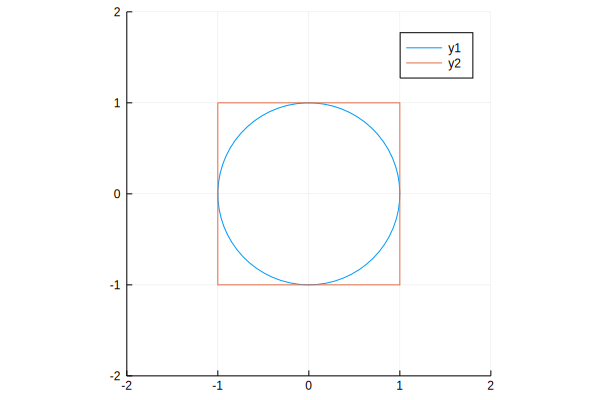

In [50]:
n=100
x=[]
y=[]
for i in 1:n
    push!(x,cos(0.1*i))
    push!(y,sin(0.1*i)) 
    end
a=[]
plot(x,y)


plot!([-1,-1,1,1,-1],[1,-1,-1,1,1],xlim=(-2,2),ylim=(-2,2),aspect_ratio=:equal)


In [55]:
A=[]
B=[]
C=[]
D=[]
circ=0
circno=0
for i in range(1,200)
    x=2*rand()-1
    y=2*rand()-1
    if x^2+y^2<=1
        push!(A,x)
        push!(B,y)
        circ=circ+1 # circ += 1 
    else
        push!(C,x)
        push!(D,y)
        circno=circno+1
    end 
end


In [56]:
scatter!(B,A,c="yellow")
scatter!(C,D,c="blue")

In [57]:
#

15723

In [54]:
circno

440

## Calcular integrales

Este tipo de métodos se pueden ocupar para calcular otras integrales complicadas, las cuales serían difíciles o imposibles de evaluar con otros métodos. Por ejemplo:

#### Ejercicio 4
Considera la función complicada (patológica) $$f(x) = \sin^2 (\textstyle \frac{1}{x}).$$

(i) Dibuja la función para $x$ entre $-2$ y $2$.

Sea $I(x) := \int_0^x f(x') dx'$. Sabemos que $0 < I(x) < x$ para toda $x$ (¿por qué?), pero no está fácil calcular su valor, ni siquiera con los métodos numéricos estándares, debido a la naturaleza complicada de la función cerca de $x = 0$.

(ii) Utiliza un método parecido al que usamos en la pregunta 2 para calcular $I(x)$ para un valor de $x$ dado. 

(iii) Dibuja la función $I(x)$.

In [61]:
using SymPy

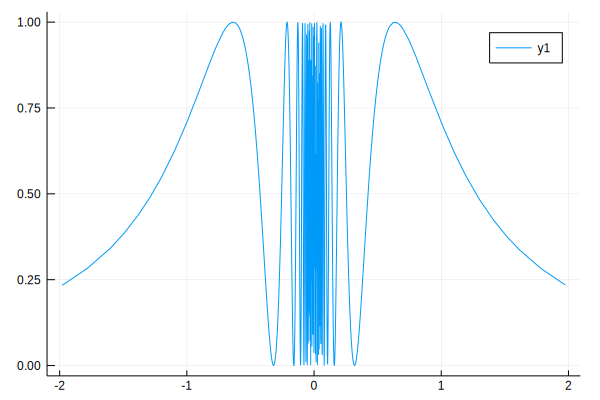

In [75]:
x=Sym("x")

plot(sin(1/x)^2,-2,2)


Los métodos tipo Monte Carlo pueden ser mucho más complicados que esto, en particular para calcular integrales en dimensión alta que son simplemente imposibles de calcular de cualquier otra manera.